In [2]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('2019DraftClass.csv')
df.head()

,Name,School,G,GS,MP,FG,FGA,FG%,2P,2PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
0,Bryce Aiken,Harvard,58,34,29.4,5.0,12.4,0.406,2.9,6.1,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
1,Nickeil Alexander-Walker,Virginia Tech,67,67,29.9,4.7,10.1,0.464,3.0,5.6,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
2,Al-Wajid Aminu,North Florida,34,26,26.0,3.6,6.7,0.542,3.4,5.9,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
3,Desmond Bane,TCU,109,82,28.7,4.2,8.2,0.516,2.8,4.8,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
4,RJ Barrett,Duke,38,38,35.3,8.4,18.5,0.454,6.5,12.2,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [4]:
df1 = df.set_index('Name')
df2 = df1.copy(deep=True)
df2 = df2.drop(['School'], axis=1)
df2.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS
Name,,,,,,,,,,,,,,,,,,,,,
Bryce Aiken,58,34,29.4,5.0,12.4,0.406,2.9,6.1,0.468,2.2,...,0.4,2.1,2.4,2.8,0.8,0.0,2.8,1.9,16.8,-1.09
Nickeil Alexander-Walker,67,67,29.9,4.7,10.1,0.464,3.0,5.6,0.529,1.7,...,0.6,3.4,4.0,2.7,1.4,0.5,2.2,1.9,13.5,7.25
Al-Wajid Aminu,34,26,26.0,3.6,6.7,0.542,3.4,5.9,0.578,0.2,...,2.6,3.8,6.5,0.7,0.4,1.1,2.1,3.6,9.1,-1.65
Desmond Bane,109,82,28.7,4.2,8.2,0.516,2.8,4.8,0.578,1.4,...,0.8,3.4,4.2,1.9,0.8,0.3,1.3,2.2,11.5,10.08
RJ Barrett,38,38,35.3,8.4,18.5,0.454,6.5,12.2,0.529,1.9,...,1.6,6.0,7.6,4.3,0.9,0.4,3.2,1.8,22.6,11.97


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df2.dropna()
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


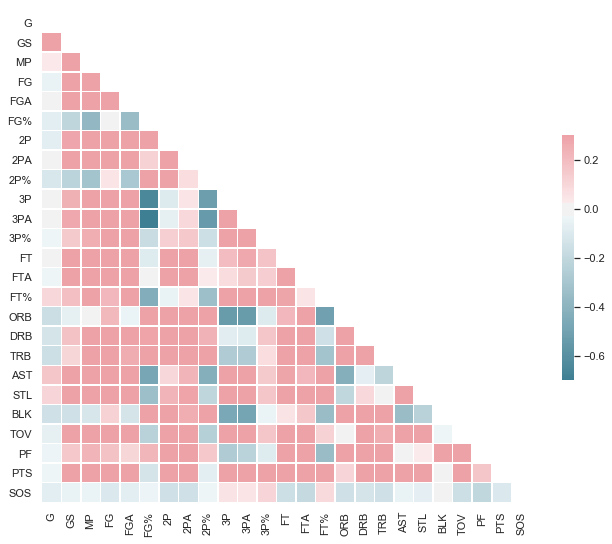

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [7]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [8]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
subSpace = TSNE().fit_transform(df2.values)
#subSpace = PCA().fit_transform(df3.values)

### K-Means

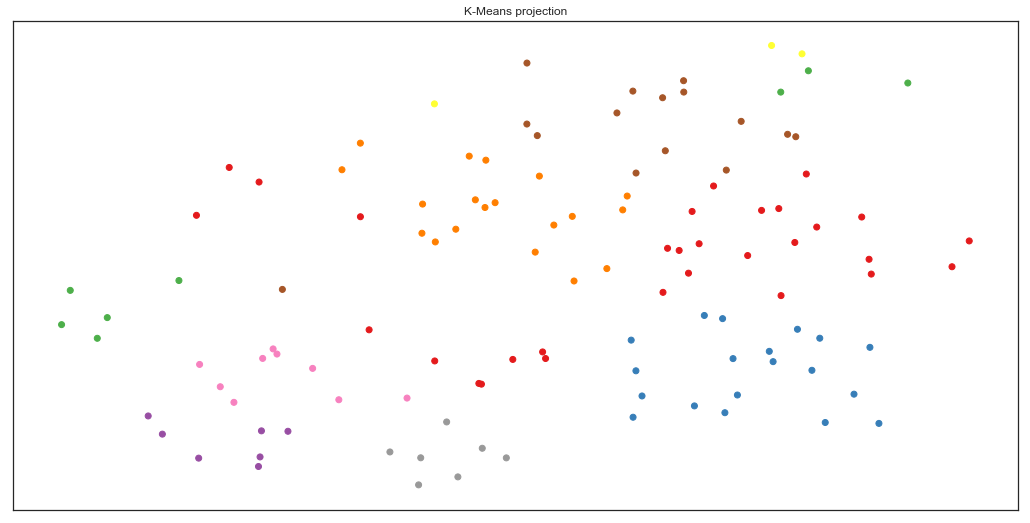

In [11]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=10, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',10)

In [12]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Bryce Aiken,-0.383867,-0.543806,0.450860,0.520757,1.032665,-0.991664,-0.172318,0.052201,-0.840248,1.462227,...,-1.047984,-1.189949,0.509884,-0.247774,-0.988204,1.399156,-0.503905,1.162106,-1.259151,0
Nickeil Alexander-Walker,-0.062554,0.645115,0.531914,0.316755,0.316822,-0.148799,-0.097369,-0.162853,0.119248,0.797061,...,-0.134003,-0.412161,0.438524,1.100577,-0.152800,0.502163,-0.503905,0.361733,0.267336,0
Al-Wajid Aminu,-1.240703,-0.832029,-0.100314,-0.431252,-0.741380,0.984708,0.202425,-0.033820,0.889991,-1.198435,...,0.147223,0.803133,-0.988662,-1.146674,0.849684,0.352664,2.698226,-0.705431,-1.361649,3
Desmond Bane,1.436908,1.185534,0.337383,-0.023248,-0.274526,0.606872,-0.247266,-0.506939,0.889991,0.397962,...,-0.134003,-0.314938,-0.132350,-0.247774,-0.486962,-0.843327,0.061177,-0.123342,0.785317,2
RJ Barrett,-1.097897,-0.399694,1.407308,2.832777,2.931203,-0.294121,2.525832,2.675860,0.119248,1.063128,...,1.693961,1.337862,1.580274,-0.023049,-0.319881,1.997151,-0.692266,2.568823,1.131248,6


In [13]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
RJ Barrett,-1.097897,-0.399694,1.407308,2.832777,2.931203,-0.294121,2.525832,2.675860,0.119248,1.063128,...,1.693961,1.337862,1.580274,-0.023049,-0.319881,1.997151,-0.692266,2.568823,1.131248,6
Bol Bol,-2.133240,-1.444504,0.515703,2.696776,1.748507,1.260819,2.750678,2.546828,0.764156,0.397962,...,2.678249,2.310097,-0.774584,-0.247774,3.522977,0.203165,-0.880626,2.180763,0.062340,6
Zion Williamson,-1.276404,-0.579834,0.548125,3.240781,1.281653,2.990144,3.799959,2.159731,3.548268,-0.533269,...,1.272123,1.969814,0.010368,2.673652,2.019250,0.801160,-0.127184,2.568823,1.131248,6


### Agglomeative Clustering

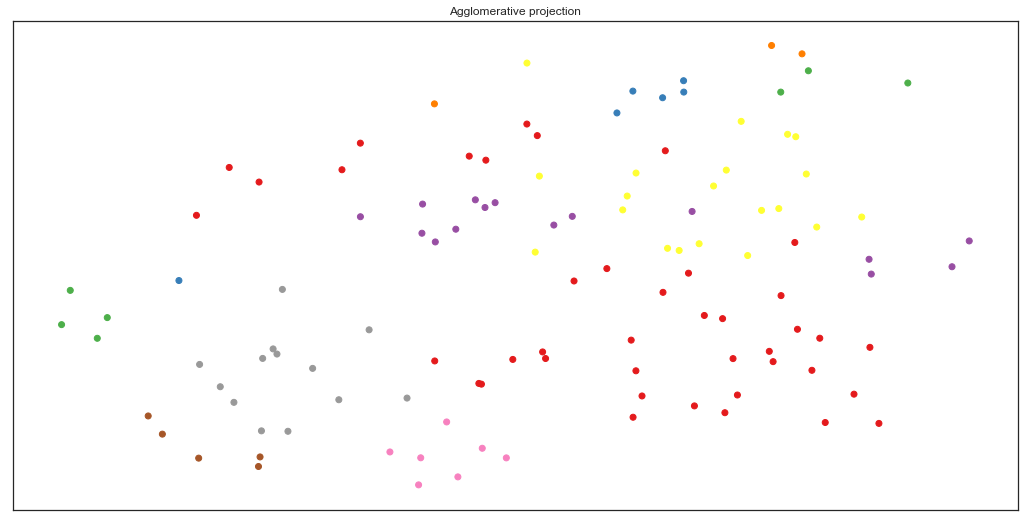

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',10)

In [15]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Bryce Aiken,-0.383867,-0.543806,0.450860,0.520757,1.032665,-0.991664,-0.172318,0.052201,-0.840248,1.462227,...,-1.047984,-1.189949,0.509884,-0.247774,-0.988204,1.399156,-0.503905,1.162106,-1.259151,4
Nickeil Alexander-Walker,-0.062554,0.645115,0.531914,0.316755,0.316822,-0.148799,-0.097369,-0.162853,0.119248,0.797061,...,-0.134003,-0.412161,0.438524,1.100577,-0.152800,0.502163,-0.503905,0.361733,0.267336,0
Al-Wajid Aminu,-1.240703,-0.832029,-0.100314,-0.431252,-0.741380,0.984708,0.202425,-0.033820,0.889991,-1.198435,...,0.147223,0.803133,-0.988662,-1.146674,0.849684,0.352664,2.698226,-0.705431,-1.361649,3
Desmond Bane,1.436908,1.185534,0.337383,-0.023248,-0.274526,0.606872,-0.247266,-0.506939,0.889991,0.397962,...,-0.134003,-0.314938,-0.132350,-0.247774,-0.486962,-0.843327,0.061177,-0.123342,0.785317,0
RJ Barrett,-1.097897,-0.399694,1.407308,2.832777,2.931203,-0.294121,2.525832,2.675860,0.119248,1.063128,...,1.693961,1.337862,1.580274,-0.023049,-0.319881,1.997151,-0.692266,2.568823,1.131248,5


In [16]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
RJ Barrett,-1.097897,-0.399694,1.407308,2.832777,2.931203,-0.294121,2.525832,2.675860,0.119248,1.063128,...,1.693961,1.337862,1.580274,-0.023049,-0.319881,1.997151,-0.692266,2.568823,1.131248,5
Bol Bol,-2.133240,-1.444504,0.515703,2.696776,1.748507,1.260819,2.750678,2.546828,0.764156,0.397962,...,2.678249,2.310097,-0.774584,-0.247774,3.522977,0.203165,-0.880626,2.180763,0.062340,5
Zion Williamson,-1.276404,-0.579834,0.548125,3.240781,1.281653,2.990144,3.799959,2.159731,3.548268,-0.533269,...,1.272123,1.969814,0.010368,2.673652,2.019250,0.801160,-0.127184,2.568823,1.131248,5


### Affinity Propagation

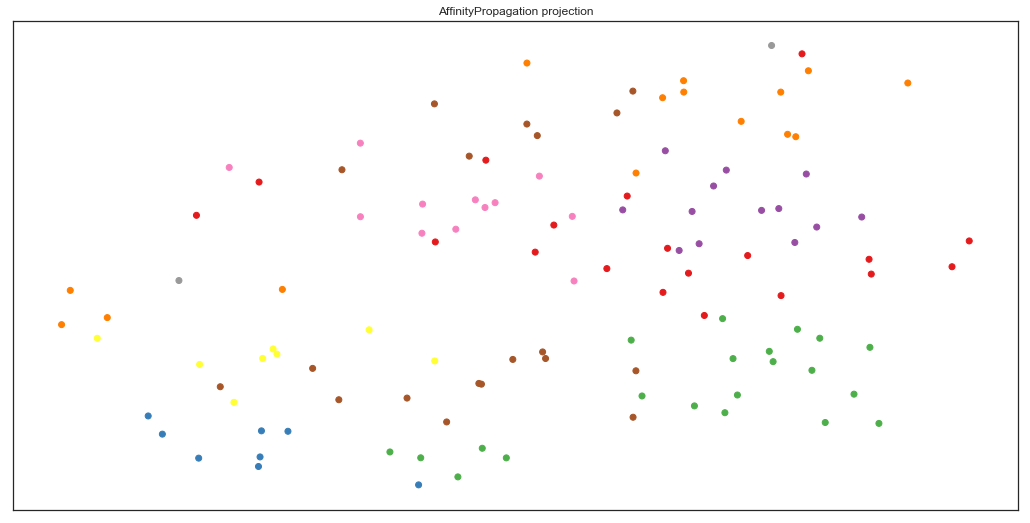

In [21]:
from sklearn.cluster import AffinityPropagation
cluster = AffinityPropagation(convergence_iter=15).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'AffinityPropagation projection',13)

In [22]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Bryce Aiken,-0.383867,-0.543806,0.450860,0.520757,1.032665,-0.991664,-0.172318,0.052201,-0.840248,1.462227,...,-1.047984,-1.189949,0.509884,-0.247774,-0.988204,1.399156,-0.503905,1.162106,-1.259151,11
Nickeil Alexander-Walker,-0.062554,0.645115,0.531914,0.316755,0.316822,-0.148799,-0.097369,-0.162853,0.119248,0.797061,...,-0.134003,-0.412161,0.438524,1.100577,-0.152800,0.502163,-0.503905,0.361733,0.267336,0
Al-Wajid Aminu,-1.240703,-0.832029,-0.100314,-0.431252,-0.741380,0.984708,0.202425,-0.033820,0.889991,-1.198435,...,0.147223,0.803133,-0.988662,-1.146674,0.849684,0.352664,2.698226,-0.705431,-1.361649,7
Desmond Bane,1.436908,1.185534,0.337383,-0.023248,-0.274526,0.606872,-0.247266,-0.506939,0.889991,0.397962,...,-0.134003,-0.314938,-0.132350,-0.247774,-0.486962,-0.843327,0.061177,-0.123342,0.785317,4
RJ Barrett,-1.097897,-0.399694,1.407308,2.832777,2.931203,-0.294121,2.525832,2.675860,0.119248,1.063128,...,1.693961,1.337862,1.580274,-0.023049,-0.319881,1.997151,-0.692266,2.568823,1.131248,10


In [23]:
name = 'Zion Williamson'
labnum = df4[df4.index == name].iloc[0].label
df4[df4['label'] == labnum]

,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SOS,label
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.276404,-0.579834,0.548125,3.240781,1.281653,2.990144,3.799959,2.159731,3.548268,-0.533269,...,1.272123,1.969814,0.010368,2.673652,2.01925,0.80116,-0.127184,2.568823,1.131248,13
